In [15]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'uci-credit-card-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5187305%2F8658432%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T074934Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D257dc882d0b48f5bc92883ad7770302fc130dc5aef9aac3078e91d8fd0f0858894721fcb925bb4808e33b4daaf7d4104146c1cdbefae737526e7baa295b318efe8fdfaaf2f0f347fe750f48e708865ef09b9246f09863458f0d6314f161b4cc9e656525ad89355011e971254bcaff42854d610a77b8ca210c4086ffeba40698561ef59aa97b59dbfb9051a6a4bf672c645bb1d8d9c5297505cb7001bc2d3698d49ec6069e83c9f7e392190761e968649065be2ee89ce2d12cc52cbe048f80645d19cb73a13f9f021dbb56c848fb2b7138b19a454d8a6eb3717f48d3da5754a691d7e9119597ee85dfb865145297bef11c6d39a414caa4fd22fafbaabc2453c42,uci-credit-card1-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5295463%2F8804976%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T074934Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db41bb41dc2b81c21af278db0122a2399919f1c9eeb0b10e7af24ef4613fd74b9399fa18b2a8df89e3695d97a5114a9b56d8deaaabe0771b10d0c34d8834eb7c91f1a2e5901027d278e1426a507328d1d9e45c190e67faadcb5717d768928c262cb3c9dc968b83646da00917c3cee65d0362aa24652e2b2f001ce8f3b21e49ecc718712cda869b1c575b6ec70faecd846403fc04985e86f9831ff6b53dbdcdfa09891ef7511733e7670f8d8f8044f975832325a9fe052a045f9234e57eb763797513a341b29ca7b4aee829001af4276dc96ff144e1702560193648ef4d6a81446b561c332148e9e6b297f8efe2c5e26172ec7bc41d3a2d693bade4129c81fcff4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1025318 bytes downloaded
Downloaded and uncompressed: uci-credit-card-csv
[==================================================] 1025318 bytes downloaded
Downloaded and uncompressed: uci-credit-card1-csv
Data source import complete.


In [2]:
# Installing Necessary library for the working.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(
    'ignore'
)
from sklearn import set_config
set_config(display = 'diagrams')

In [3]:
df = pd.read_csv("/kaggle/input/uci-credit-card-csv/UCI_Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
for i in range(1,7):
    df[f'overdue pay_mon{i}'] = df[F'BILL_AMT{i}']-df[f'PAY_AMT{i}']
    df.drop([f'PAY_AMT{i}',f'BILL_AMT{i}'],axis = 1,inplace = True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,overdue pay_mon1,overdue pay_mon2,overdue pay_mon3,overdue pay_mon4,overdue pay_mon5,overdue pay_mon6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,1,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,0,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,0,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,1,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,1,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [6]:
df.describe() # Describition of the Dataset like mean, std and spread of Data.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,overdue pay_mon1,overdue pay_mon2,overdue pay_mon3,overdue pay_mon4,overdue pay_mon5,overdue pay_mon6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35512.013333,33656.257833
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-414380.000000,-684896.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15538.000000,13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46961.500000,46067.250000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,913727.000000,9.332080e+05,1.542258e+06,841586.00000,877171.000000,911408.000000


In [7]:
df.isnull().sum() # No missing values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
default.payment.next.month    0
overdue pay_mon1              0
overdue pay_mon2              0
overdue pay_mon3              0
overdue pay_mon4              0
overdue pay_mon5              0
overdue pay_mon6              0
dtype: int64

In [8]:
df.drop_duplicates() # In the Dataset there is no duplicate values

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,overdue pay_mon1,overdue pay_mon2,overdue pay_mon3,overdue pay_mon4,overdue pay_mon5,overdue pay_mon6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,1,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,0,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,0,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,1,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,1,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [9]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,overdue pay_mon1,overdue pay_mon2,overdue pay_mon3,overdue pay_mon4,overdue pay_mon5,overdue pay_mon6
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,-0.013952,0.017306,0.014968,0.014425,0.038532,0.016608,0.015677
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,-0.153520,0.243040,0.216327,0.230056,0.244998,0.241950,0.222605
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.039961,-0.033799,-0.030144,-0.022398,-0.021381,-0.016653,-0.015750
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.028006,0.032208,0.027927,0.023162,0.008874,0.002586,0.001986
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.024339,-0.022267,-0.018618,-0.024029,-0.020303,-0.025192,-0.019034
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.013890,0.050675,0.046325,0.046320,0.046242,0.043778,0.041383
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.324794,0.206193,0.208475,0.197854,0.195112,0.196044,0.192564
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.263551,0.254637,0.249474,0.238524,0.234129,0.231599,0.228013
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.235253,0.209496,0.253950,0.241217,0.238911,0.235100,0.230718
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.216614,0.206212,0.222101,0.262766,0.257029,0.252355,0.244631


In [10]:
df.shape

(30000, 19)

<Axes: >

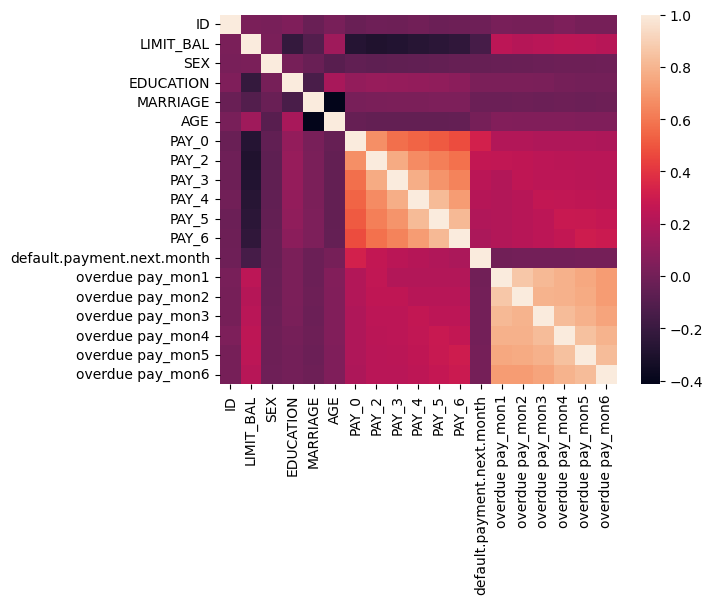

In [11]:
sns.heatmap(df.corr())

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default.payment.next.month', 'overdue pay_mon1', 'overdue pay_mon2',
       'overdue pay_mon3', 'overdue pay_mon4', 'overdue pay_mon5',
       'overdue pay_mon6'],
      dtype='object')

The Dataset provide is hightly imbalanced Dataset

In [13]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [16]:
! pip install ydata-profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X = df.drop('default.payment.next.month',axis = 1)
y = df["default.payment.next.month"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape , X_test.shape


((20100, 18), (9900, 18))

In [ ]:
y_train.shape, y_test.shape

((20100,), (9900,))

In [ ]:
# Installing Machine models which could perform well over the same classifier data.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
!pip install Xgboost
import xgboost as xb
from xgboost import XGBClassifier


In [ ]:
## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegressionCV(),
    'Decision Tree':DecisionTreeClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'xgboost': XGBClassifier()

}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Evaluare_model function to find out the best model which having highest Accuracy.
def Evaluate_model(X_train,y_train,X_test,y_test,models):
  report = {}
  report1 = {}
  report2 = {}
  for i in range(len(models)):
    model = list(models.values())[i]
    #train model
    model.fit(X_train,y_train)


    #predict Testing data
    y_test_pred = model.predict(X_test)

    #get accuracy for test data prediction
    test_model_score_con = confusion_matrix(y_test,y_test_pred)
    test_model_score_acc = accuracy_score(y_test,y_test_pred)
    test_model_score_clas = print(classification_report(y_test,y_test_pred))
    report[list(models.keys())[i]] = test_model_score_acc
    report1[list(models.keys())[i]] = test_model_score_con
    report2[list(models.keys())[i]] = test_model_score_clas

  return report,report2,report1

In [ ]:
Evaluate_model(X_train,y_train,X_test,y_test,models)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.64      0.36      0.46      2158

    accuracy                           0.82      9900
   macro avg       0.74      0.65      0.68      9900
weighted avg       0.80      0.82      0.80      9900

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7742
           1       0.69      0.23      0.35      2158

    accuracy                           0.81      9900
   macro avg       0.75      0.60      0.62      9900
weighted avg       0.79      0.81      0.77      9900

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7742
           1       0.39      0.43      0.41      2158

    accuracy                           0.73      9900
   macro avg       0.61      0.62      0.62      9900
weighted avg       0.74      0.73      0.73      9900

              preci

({'Random Forest': 0.8164646464646464,
  'Logistic Regression': 0.8093939393939394,
  'Decision Tree': 0.7304040404040404,
  'Adaboost': 0.8189898989898989,
  'xgboost': 0.8142424242424242},
 {'Random Forest': None,
  'Logistic Regression': None,
  'Decision Tree': None,
  'Adaboost': None,
  'xgboost': None},
 {'Random Forest': array([[7301,  441],
         [1376,  782]]),
  'Logistic Regression': array([[7514,  228],
         [1659,  499]]),
  'Decision Tree': array([[6313, 1429],
         [1240,  918]]),
  'Adaboost': array([[7404,  338],
         [1454,  704]]),
  'xgboost': array([[7268,  474],
         [1365,  793]])})

Here we got that Decision tree, Xgboost and Random forest are having higtest Accuracy, so we will now on focus on these two along with hyperparametering

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [ ]:
def find_best_classifier(X_train, y_train, X_test, y_test):
    # Define the classifiers
    classifiers = {
        'Decision Tree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(),
        'xgboost': XGBClassifier()
    }

    # Define the hyperparameter grids for each classifier
    param_grids = {
        'Decision Tree': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2'],
            'random_state': [42]
        },
        'RandomForest': {
            'max_features': [5, 10],
            'max_depth': [10, 15],
            'criterion': ['log_loss']
        },
        'xgboost': {
            'n_estimators': [150],
            'learning_rate': [0.1],
            'max_depth': [4, 6, 8, 10, 15, None],
            'max_features': [10, 15]
        }
    }

    # Perform RandomizedSearchCV for each classifier
    best_classifiers = {}
    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name}...")
        random_search = RandomizedSearchCV(clf, param_distributions=param_grids[clf_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        best_classifiers[clf_name] = random_search.best_estimator_
        print(random_search.best_estimator_)

    # Evaluate the classifiers on the test set
    best_scores = {}
    for clf_name, clf in best_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        best_scores[clf_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'confusion_matrix': confusion_mat,
            'classification_report': classification_rep
        }

        print(f"{clf_name} Test Scores:")
        print(f" - Accuracy: {accuracy:.4f}")
        print(f" - Precision: {precision:.4f}")
        print(f" - Recall: {recall:.4f}")
        print(f" - Confusion Matrix:\n{confusion_mat}")
        print(f" - Classification Report:\n{classification_rep}")

    return best_scores


# Call the function to find the best classifier
best_classifier = find_best_classifier(X_train, y_train, X_test, y_test)

Training Decision Tree...
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)
Training RandomForest...
RandomForestClassifier(criterion='log_loss', max_depth=10, max_features=10)
Training xgboost...
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_job

before that As mentioned above the dataset is imbalance so, Now we will first use most popular way to balace(smote) unbalance data.

In [ ]:
# So Now we have four choice to balance the Dataset(1- upsampling, 2- downsampling,3- smote, 4- class_weight of algo)
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [ ]:
df.shape

(30000, 19)

In [ ]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [ ]:
y_train.value_counts() ## Large amount of difference in both classes

default.payment.next.month
0    15622
1     4478
Name: count, dtype: int64

In [ ]:
X_resampled_smote.shape

(31244, 18)

In [ ]:
y_resampled_smote.shape

(31244,)

In [ ]:
y_resampled_smote.value_counts() ## Now we having balanced information for both categories

default.payment.next.month
1    15622
0    15622
Name: count, dtype: int64

In [ ]:
## Using these three models whcih have highest Accuracy over balance data.
models1={
    'Random Forest':RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'xgboost': XGBClassifier()

}

Trainiing and Evaluating the performance of model with balance Dataset

In [ ]:
def Evaluate_model1(X_resampled_smote,yresampled_smote,X_test,y_test,models1):
  report = {}
  for i in range(len(models1)):
    model = list(models1.values())[i]
    #train model
    model.fit(X_train,y_train)


    #predict Testing data
    y_pred3 = model.predict(X_test)

    #get accuracy for test data prediction
    print([list(models1.keys())[i]])
    print(confusion_matrix(y_test,y_pred3))
    print(accuracy_score(y_test,y_pred3))
    print(classification_report(y_test,y_pred3))

  return report

In [ ]:
Evaluate_model1(X_resampled_smote,y_resampled_smote,X_test,y_test,models1)

['Random Forest']
[[7286  456]
 [1371  787]]
0.8154545454545454
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.63      0.36      0.46      2158

    accuracy                           0.82      9900
   macro avg       0.74      0.65      0.68      9900
weighted avg       0.80      0.82      0.80      9900

['Adaboost']
[[7411  331]
 [1473  685]]
0.8177777777777778
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7742
           1       0.67      0.32      0.43      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.64      0.66      9900
weighted avg       0.80      0.82      0.79      9900

['xgboost']
[[7274  468]
 [1381  777]]
0.8132323232323232
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.62      0.36      0.46      2158

 

{}

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

Using Hyperparametering to got more accuracy.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_train = X_resampled_smote
y_train = y_resampled_smote

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def find_best_classifier():
    # Define the classifiers
    classifiers = {
        'AdaBoost': AdaBoostClassifier(),
        'RandomForest': RandomForestClassifier(),
        'xgboost': XGBClassifier()

    }

    # Define the hyperparameter grids for each classifier
    param_grids = {
        'AdaBoost': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.1,0.3,0.5,0.7, 1]
        },
        'RandomForest': {
            'n_estimators': [10,20,40, 50,70,90,100],
            'max_features': [5,8,10,15,20,35,40,50],
            'max_depth': [4, 6, 8, 10,15, None],
            'criterion':["gini", "entropy", 'log_loss']
        },
         'xgboost': {
            'n_estimators': [150],
            'learning_rate': [0.1],
            'max_depth': [4, 6, 8, 10, 15, None],
            'max_features': [10, 15]
        }
    }

    # Perform RandomizedSearchCV for each classifier
    best_classifiers = {}
    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name}...")
        random_search = RandomizedSearchCV(clf, param_distributions=param_grids[clf_name], n_iter=5, cv=5, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        best_classifiers[clf_name] = random_search.best_estimator_
        print(random_search.best_estimator_)


    # Evaluate the classifiers on the test set
    best_scores = {}
    for clf_name, clf in best_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        confusion_mat = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        best_scores[clf_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'confusion_matrix': confusion_mat,
            'classification_report': classification_rep
        }

        print(f"{clf_name} Test Scores:")
        print(f" - Accuracy: {accuracy:.4f}")
        print(f" - Precision: {precision:.4f}")
        print(f" - Recall: {recall:.4f}")
        print(f" - Confusion Matrix:\n{confusion_mat}")
        print(f" - Classification Report:\n{classification_rep}")



    # Identify the best classifier
    best_classifier_name = max(best_scores, key=lambda x: best_scores[x]['accuracy'])
    print(f"\nBest Classifier: {best_classifier_name} with accuracy: {best_scores[best_classifier_name]['accuracy']:.4f}")
    return best_classifiers[best_classifier_name]

# Call the function to find the best classifier
best_classifier = find_best_classifier()

Training AdaBoost...
AdaBoostClassifier(learning_rate=0.01)
Training RandomForest...
RandomForestClassifier(max_depth=6, max_features=40, n_estimators=70)
Training xgboost...
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)
AdaBoost Test Scores:
 - Accuracy: 0.8215
 - Precision: 0.6934
 - Recall: 

## Now using Stacting technique for enhance accuracy of model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(max_depth=6, max_features=40, n_estimators=70)),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)),
    ('ad', AdaBoostClassifier()),
    ('xgboost',XGBClassifier( learning_rate=0.1,max_depth=4, max_features=10, n_estimators=150)),
    ('Decision Tree1', DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)),

]

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators = estimators,
    final_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42),
    cv = 10
)

In [ ]:
from sklearn import set_config
set_config(display = 'diagram')

In [ ]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       max_features=40,
                                                       n_estimators=70)),
                               ('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='log2',
                                                       min_samples_split=5,
                                                       random_state=42)),
                               ('ad', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_by...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('Decision Tree1',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='log2',
                                                       min_samples_split=5,
                                                       random_state=42))],
                   final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=5,
                                                          max_features='log2',
                                                          min_samples_split=5,
                                                          random_state=42))

In [ ]:
y_pred  =clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8190909090909091
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.65      0.37      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900

0.371177015755329


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.ensemble import StackingClassifier
for i in estimators:
    print(i[1])

    clf = StackingClassifier(
        estimators = estimators,
        final_estimator = i[1],
        cv = 10
    )
    clf.fit(X_train_scaled, y_train)
    y_pred  =clf.predict(X_test_scaled)
    print(f'{i[1]}',accuracy_score(y_test,y_pred))
    print(f'{i[1]}\n',classification_report(y_test,y_pred))

RandomForestClassifier(max_depth=6, max_features=40, n_estimators=70)
RandomForestClassifier(max_depth=6, max_features=40, n_estimators=70) 0.8208080808080808
RandomForestClassifier(max_depth=6, max_features=40, n_estimators=70)
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7742
           1       0.66      0.37      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42) 0.8189898989898989
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=5, random_state=42)
       

As per above ReSearch we have found that, that Dataset is imbalance but after using smote technique to balace the row Data we getting worse performance.

As we are finding fault payment, so In this case Recall is more important and precision, With help of hyperparametering along with stacking technique we getting hight recall in Decision Tree classifieralong with hightest Accuracy which is 82%